# 8. In this exercise, we will generate simulated data, and will then use this data to perform forward and backward stepwise selection.

## (a) Create a random number generator and use its normal() method to generate a predictor X of length n = 100, as well as a noise vector of length n = 100.

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


#Generate data
np.random.seed(0)
n = 100
X = np.random.normal(size=n)
epsilon = np.random.normal(size=n)

## (b) Generate a response vector Y of length n = 100 according to the model Y = β0+β1X+β2X2+β3X3+ε , whereβ0,β1,β2, and β3 are constants of your choice.

In [3]:
from sklearn.preprocessing import PolynomialFeatures

#Choose constants for the model
beta_0, beta_1, beta_2, beta_3 = 1, 2, 3, 4

#Generate response Y according to the given model
Y = beta_0 + beta_1 * X + beta_2 * X**2 + beta_3 * X**3 + epsilon

#Prepare predictors: X, X^2, ..., X^10
poly = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly.fit_transform(X.reshape(-1, 1))

## (c) Use forward stepwise selection in order to select a model contain ing the predictors X,X2,...,X10. What is the model obtained according to Cp? Report the coefficients of the model obtained.

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector

#Sequential Feature Selector for forward selection
linear_model = LinearRegression()
forward_sfs = SequentialFeatureSelector(linear_model, n_features_to_select='auto', direction='forward')
forward_sfs.fit(X_poly, Y)
selected_features_forward = forward_sfs.get_support(indices=True)

#Fit the model with selected features
X_forward_selected = X_poly[:, selected_features_forward]
model_forward = sm.OLS(Y, sm.add_constant(X_forward_selected)).fit()
print("Forward Stepwise Selection Coefficients:")
print(model_forward.params)

Forward Stepwise Selection Coefficients:
[ 1.15959824  1.51956405  2.91523455  4.75358146 -0.2105724   0.01545021]


## (d) Repeat (c), using backwards stepwise selection. How does your answer compare to the results in (c)?

In [10]:
#Sequential Feature Selector for backward selection
backward_sfs = SequentialFeatureSelector(linear_model, n_features_to_select='auto', direction='backward')
backward_sfs.fit(X_poly, Y)
selected_features_backward = backward_sfs.get_support(indices=True)

#Fit the model with selected features
X_backward_selected = X_poly[:, selected_features_backward]
model_backward = sm.OLS(Y, sm.add_constant(X_backward_selected)).fit()
print("Backward Stepwise Selection Coefficients:")
print(model_backward.params)


Backward Stepwise Selection Coefficients:
[ 2.02958511  1.00343255  5.43191348 -0.02586092 -1.71905645  0.15516683]


Why different?

1.Order of Variable Selection:

In forward selection, predictors are added one by one. The order in which variables are added can lead to a different subset of predictors since early choices can influence later ones:then backward selection, all predictors start in the model, so the algorithm is initially fitting a more complex model and then simplifies it by removing variables.

2.Local vs. Global Optima:

Both methods can lead to different models because they each follow a different path through the space of possible models. Each approach might end up at a different local minimum, particularly if the predictors are correlated or have non-linear relationships.Neither method guarantees finding the "best" model overall; they provide good approximations based on the chosen selection strategy.

## (e) Now fit a lasso model to the simulated data, again using X,X2,...,X10 as predictors. Use cross-validation to select the optimal value of λ. Create plots of the cross-validation error as a function of λ. Report the resulting coefficient estimates, and discuss the results obtained.

c:\Users\坤達\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.249203685331395, tolerance: 1.7466233179205086
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\坤達\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.21211854031503, tolerance: 1.7466233179205086
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\坤達\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.3677156886665216, tolerance: 2.3498240213052504
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\

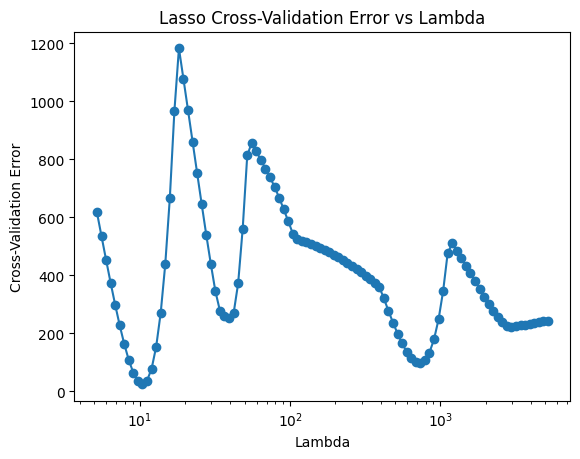

In [4]:
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

lasso = LassoCV(cv=10).fit(X_poly, Y)

plt.plot(lasso.alphas_, lasso.mse_path_.mean(axis=1), marker='o')
plt.xlabel('Lambda')
plt.ylabel('Cross-Validation Error')
plt.title('Lasso Cross-Validation Error vs Lambda')
plt.xscale('log')
plt.show()


λ=10 has the fewest error

## (f) Now generate a response vector Y according to the model Y = β0+β7X7+ε , and perform forward stepwise selection and the lasso. Discuss the results obtained

In [14]:
beta_7 = 7
Y_new = beta_0 + beta_7 * X**7 + epsilon

# Forward stepwise selection for the new model
forward_sfs_new = SequentialFeatureSelector(linear_model, n_features_to_select='auto', direction='forward')
forward_sfs_new.fit(X_poly, Y_new)
selected_features_forward_new = forward_sfs_new.get_support(indices=True)

# Fit the model with selected features
X_forward_selected_new = X_poly[:, selected_features_forward_new]
model_forward_new = sm.OLS(Y_new, sm.add_constant(X_forward_selected_new)).fit()
print("Forward Stepwise Selection Coefficients for New Model:")
print(model_forward_new.params)

# Lasso for the new model
lasso_new = LassoCV(cv=10).fit(X_poly, Y_new)
print("Lasso Coefficients for New Model:")
print(lasso_new.coef_)

Forward Stepwise Selection Coefficients for New Model:
[ 1.07899026e+00 -6.12277745e-01  1.05079218e+00 -3.51310787e-01
  7.03189830e+00  5.63857463e-05]
Lasso Coefficients for New Model:
[0.         0.         0.         0.         0.         0.
 0.         0.         1.18509122 0.04362939]


1.Forward Stepwise Selection starts with no variables and adds the most significant variable at each step, so the final model generally includes more non-zero coefficients (as seen here), which may have both positive and negative values.However, it lacks strong regularization, so even small coefficients remain in the model.

2.Lasso Regression applies L1 regularization (an absolute value penalty) to perform variable selection by shrinking the coefficients of unimportant variables to zero, resulting in a sparse model that contains only a few significant variables.In this result, only two variables have non-zero coefficients, specifically 1.18509122 and 0.04362939, which means that Lasso identified these as the only variables with substantial predictive value, and it set the other coefficients to zero as they contributed minimally to the model.